In [ ]:
import keras as ks
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
einkommen = pd.read_csv("einkommen.train")

In [ ]:
# changing index cols with 
einkommen.columns = ['Age', 'Employment', 'Weighting factor', 'Level of education', 
                'Schooling/training period', 'Marital status', 'Employment area', 'Partnership', 
                'Ethnicity', 'Gender', 'Gains on financial assets', 'Losses on financial assets', 
                'Weekly working time', 'Country of birth','Income'] 

In [ ]:
def rounding(digits,threshold = 0.50):
    """rounds a list of float digits with ad threshhold"""
    if type(digits) == list  or  type(digits) == np.ndarray:
        return np.array(list(map(rounding, digits)))
    if type(digits)== np.float64 or type(digits)== np.float32:
        k = digits % 1
        f = digits - k

        if k >= threshold:
            return (f + 1)
        else:
            return f
    else:
        raise ValueError("Wrong Type")

In [ ]:
def binary_enc(dataframe, colname):
    """cast a string into a binary int variable
    
    Arguments:
        dataframe: DataFrame to change
        colname:   String Column that has to change
        
    Return:
        the changed DataFrame
    
    """
    temp_df = dataframe.copy(deep=True)

    var_1, var_2 = temp_df.loc[:,colname].unique()
    #print(var_1, ": 1")
    #print(var_2, ": 0")

    mapper = {
        var_1: 1 ,
        var_2: 0 
    }   
    #print(mapper)
    
    temp_df[colname] = temp_df[colname].replace(mapper)
    return temp_df, mapper

In [ ]:
def binary_encoding(dataframe, colnames):
    """cast a string into a binary int variable
    
    Arguments:
        dataframe: DataFrame to change
        colname:   String Column that has to change
        
    Return:
        the changed DataFrame
    
    """
    temp_df = dataframe.copy(deep=True)
    
    maps = {   }

    if type(colnames) == list:
        for i, col in enumerate(colnames):
            temp_df, dictionary = binary_enc(temp_df, col)
            #maps.update( {colnames : dictionary} )
            
            maps.update( {col : dictionary} )
    else:
        temp_df, dictionary = binary_enc(temp_df, colnames)
            
    return temp_df,maps

In [ ]:
def zscore_normalisation(dataframe, colname):
    """zscore transformation 
    
    Arguments:
        dataframe: DataFrame to change
    Return:
        the changed DataFrame        
    """
    temp_df = dataframe.copy(deep=True)
    temp_df[colname] = (temp_df[colname] - temp_df[colname].mean()) / temp_df[colname].std()
    
    return temp_df

In [ ]:
def split_dataframe(dataframe, colname):
    """ splitting data frame in to two dataframes
    
    Arguments:
        dataframe: DataFrame to change
        colname:   the selected column would be splitt and returned in a different dataframe
        
    Return:
        dataframe without the given colname
        dataframe with only the colname
    """
    temp_df = dataframe.copy(deep=True)
    
    ordinal_column_df = temp_df.loc[:, colname]
    not_ordinal_df = temp_df.drop(columns=colname)
    return ordinal_column_df, not_ordinal_df

In [ ]:
#ordinal_level_of_education = {' HS-grad': 0, ' 9th': 1, ' 11th': 2, ' Bachelors': 3, ' Masters': 4}

In [ ]:
#the set with given Target
set_1 = einkommen[:4999]

In [ ]:
#check for numbers
int_col = [col for i, col in enumerate(set_1.columns) if set_1[col].dtype == int ]
#z normalization for nummeric values
znorm_df = zscore_normalisation(set_1, int_col)

In [ ]:
#checking for ?
for i, k in enumerate(set_1.columns):
    unique_names = set_1.loc[:,k].unique()
    if "?" in k:
        print(k)

In [ ]:
print("Country of birth: ",sum(set_1['Country of birth'].str.contains('?', regex=False)))
print("Employment area: ",sum(set_1['Employment area'].str.contains('?', regex=False)))
print("Employment: ",sum(set_1['Employment'].str.contains('?', regex=False)))

In [ ]:
#check for nominals
nominal_col = [col for i, col in enumerate(set_1.columns) if set_1[col].dtype != int ]

In [ ]:
nominal_col

In [ ]:
#checking for binary
for i, k in enumerate(nominal_col):
    unique_names = set_1.loc[:,k].unique()
    print("\n",k,":", len(unique_names))

In [ ]:
bin_encoded, maps = binary_encoding(znorm_df, ["Gender", "Income"])

In [ ]:
maps

In [ ]:
nominal_col = [col for i, col in enumerate(bin_encoded.columns) if bin_encoded[col].dtype != int and bin_encoded[col].dtype != float ]

In [ ]:
nominal_col

In [ ]:
#one hot encoding the nominals
transformed_df = pd.get_dummies(bin_encoded, columns=nominal_col)

In [ ]:
y = transformed_df["Income"]
X = transformed_df.drop(columns=['Income'])

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train.shape

Trying Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data,digits.target
from sklearn.svm import SVC

#Out [1] : 1 loops, best of 3: 17.9 s per loop

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
%timeit single_core_learning = cross_val_score(SVC(), X, y, cv=20, n_jobs=1)

18.2 s ± 2.78 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit multi_core_learning  = cross_val_score(SVC(), X, y,cv=20, n_jobs=-1)

4.4 s ± 395 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Parameter Optimization

In [34]:
test_accuracy_score   = []
train_accuracy_score = []

for i in range(20):
    val_accuracy_score_temp   = []
    train_accuracy_score_temp = []
    #print("parapemter i", i)
    # Create and fit the model
    test_scores = cross_val_score(KNeighborsClassifier(i+1), X_test, y_test,cv=20, n_jobs=-1)
    train_scores = cross_val_score(KNeighborsClassifier(i+1), X_train, y_train,cv=20, n_jobs=-1)
    test_accuracy_score.append(np.mean(test_scores))
    train_accuracy_score.append(np.mean(train_scores))         

In [35]:
print("Best test parameter: ", np.argmax(test_accuracy_score)) 
print("Best train parameter: ", np.argmax(train_accuracy_score)) 

Best test parameter:  6
Best train parameter:  14


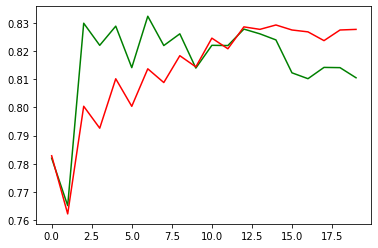

In [36]:
plt.plot(test_accuracy_score, label='val_accuracy_score:', color ="green")
plt.plot(train_accuracy_score, label='train_accuracy_score:', color ="red")

In [38]:
knn = KNeighborsClassifier(17)

In [39]:
val_accuracy_score   = []
train_accuracy_score = []

index = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index] , X.loc[test_index]
    y_train, y_test = target.loc[train_index], target.loc[test_index]
    knn.fit(X_train,y_train)
    
    # Predict on the test features, print the results
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    #print(classification_report(y_test,pred))
    val_accuracy_score.append(accuracy_score(y_test,y_pred_test))
    train_accuracy_score.append(accuracy_score(y_train,y_pred_train))
    
print(np.mean(val_accuracy_score))
print(np.mean(train_accuracy_score))   

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [ ]:
plt.plot(val_accuracy_score, label='val_accuracy_score:', color ="green")
plt.plot(train_accuracy_score, label='train_accuracy_score:', color ="red")

Getting the best result

In [40]:
knn = KNeighborsClassifier(17)
knn.fit(X_train,y_train)

# Predict on the test features, print the results
y_pred = knn.predict(X_test)
#print(classification_report(y_test,pred))
loss.append(sum((y_test- knn.predict(X_test)) ** 2))

print(classification_report(y_test,y_pred))

NameError: name 'loss' is not defined

Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(max_depth = 1)

In [43]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
test_accuracy_scores = []
train_accuracy_scores = []

for i in range(1,2):
    # Create and fit the model
    %timeit train_scores =  cross_val_score(RandomForestClassifier(max_depth = i), X_train, y_train, cv=20, n_jobs=-1)
    %timeit test_scores  =  cross_val_score(RandomForestClassifier(max_depth = i), X_test, y_test, cv=20, n_jobs=-1)
    test_accuracy_scores.append(np.mean(test_scores))
    train_accuracy_scores.append(np.mean(train_scores))

222 ms ± 34.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
114 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
print("Best test parameter: ", np.argmax(test_accuracy_scores)) 
print("Best train parameter: ", np.argmax(train_accuracy_scores)) 

Best test parameter:  0
Best train parameter:  0


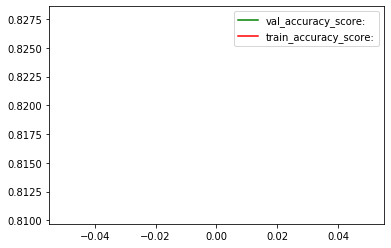

In [46]:
plt.plot(test_accuracy_scores, label='val_accuracy_score:', color ="green")
plt.plot(train_accuracy_scores, label='train_accuracy_score:', color ="red")
plt.legend()
plt.show()

In [48]:
rclf = RandomForestClassifier(max_depth = 14)
rclf.fit(X_train,y_train)

# Predict on the test features, print the results
y_pred = rclf.predict(X_test)
#print(classification_report(y_test,pred))
#loss.append(sum((y_test- rclf.predict(X_test)) ** 2))

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.66       128
           1       0.87      0.92      0.90       372

    accuracy                           0.84       500
   macro avg       0.80      0.76      0.78       500
weighted avg       0.83      0.84      0.83       500



In [61]:
X.shape

(4999, 104)

In [60]:
y.shape

(4999,)

In [49]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras import metrics
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

def classifier():
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=["acc"])
    return model

In [50]:
from keras import backend
print(backend.tensorflow_backend._get_available_gpus())

['/job:localhost/replica:0/task:0/device:GPU:0']


In [65]:
model = KerasClassifier(build_fn=classifier, epochs=1, batch_size=1, verbose=1)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)
results = cross_val_score(model, X, y, cv=kfold, n_jobs=1)
print(results.mean())

Epoch 1/1
2500/2500 [==============================] - 2s 743us/step
Epoch 1/1
2499/2499 [==============================] - 2s 884us/step
0.8451680672268908


In [ ]:
X_train.shape

In [ ]:
classifier = classifier(X_train.shape[1])

In [ ]:
%timeit train_scores =  cross_val_score(classifier(X_train.shape[1]), X_train, y_train, cv=20, n_jobs=-1)

In [ ]:
test_accuracy_scores = []
train_accuracy_scores = []

for i in range(1,2):
    # Create and fit the model
    %timeit train_scores =  cross_val_score(classifier(X_train.shape[1]), X_train, y_train, cv=20, n_jobs=-1)
    %timeit test_scores  =  cross_val_score(classifier(X_train.shape[1]), X_test, y_test, cv=20, n_jobs=-1)
    test_accuracy_scores.append(np.mean(test_scores))
    train_accuracy_scores.append(np.mean(train_scores))

In [ ]:
print("Best test parameter: ", np.argmax(test_accuracy_scores)) 
print("Best train parameter: ", np.argmax(train_accuracy_scores)) 

In [ ]:
plt.plot(test_accuracy_scores, label='val_accuracy_score:', color ="green")
plt.plot(train_accuracy_scores, label='train_accuracy_score:', color ="red")
plt.legend()
plt.show()

In [ ]:
save_cmodel_wieghts_path = "model_weights_best2.hdf5"

In [ ]:
history = classifier.fit(X_train,y_train, epochs = 100,batch_size =100,verbose=3,callbacks=[ ModelCheckpoint(
               filepath=save_cmodel_wieghts_path,
               verbose=1, save_best_only=True)],
          validation_data=(X_test, y_test))

In [ ]:
classifier.load_weights(save_cmodel_wieghts_path)
y_pred = classifier.predict(X_test)
y_pred = rounding(y_pred)
print(classification_report(y_test,y_pred))

In [ ]:
clf = LogisticRegression(fit_intercept = True, C = C)

Logistic Regression

In [ ]:
val_accuracy_score   = []
train_accuracy_score = []

for i in range(1,100):
    # Create and fit the model
    logreg = LogisticRegression(fit_intercept = True, C = i)
    logreg.fit(X_train,y_train)

    # Predict on the test features, print the results
    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)
    #print(classification_report(y_test,pred))
    val_accuracy_score.append(accuracy_score(y_test,y_pred_test))
    train_accuracy_score.append(accuracy_score(y_train,y_pred_train))

In [ ]:
plt.plot(val_accuracy_score, label='val_accuracy_score:', color ="green")
plt.plot(train_accuracy_score, label='train_accuracy_score:', color ="red")

In [ ]:
np.argmax(val_accuracy_score)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1)

logreg.fit(X_train,y_train)

In [ ]:
# Predict on the test features, print the results
y_pred = logreg.predict(X_test)
#print(classification_report(y_test,pred))
print(classification_report(y_test,y_pred))

In [ ]:
val_accuracy_score   = []
train_accuracy_score = []

index = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index] , X.loc[test_index]
    y_train, y_test = target.loc[train_index], target.loc[test_index]
    logreg.fit(X_train,y_train)
    
    # Predict on the test features, print the results
    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)
    #print(classification_report(y_test,pred))
    val_accuracy_score.append(accuracy_score(y_test,y_pred_test))
    train_accuracy_score.append(accuracy_score(y_train,y_pred_train))
    
print(np.mean(val_accuracy_score))
print(np.mean(train_accuracy_score))    